In [303]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split

**Nonlin_ker_1**

Импорт данных

In [304]:
df = pd.read_excel('Nonlin_ker_1.xlsx', sheet_name='Лист8')
X = np.array(df.iloc[:, :2])
y = np.array(df.iloc[:, -1])

Функция ядер

In [305]:
from numpy import linalg as LA
def kernel_function(kernel, x, v, gamma, r, d):
    if kernel == 'poly':
        return (gamma * np.dot(x, v) + r) ** d
    else:
        return np.exp(-gamma * LA.norm(x - v) ** 2)
    

Разделение на обучающую и тестовую выборки

In [306]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state=42)

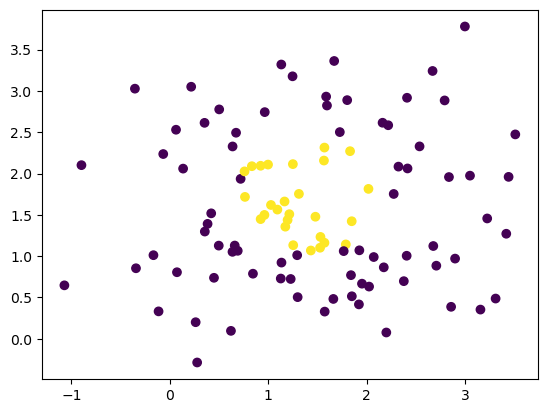

In [307]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', label='Обучающая выборка')

Обучение

In [308]:
clf = svm.SVC(kernel='rbf', gamma = 'scale' )
clf.fit(X_train, y_train)
y_train_pred =  np.array(clf.predict(X_train))
y_test_pred = np.array(clf.predict(X_test))

non_classified = np.array([[1.5, 1.75], [2, 0.5], [0, 3]])
y_pred = clf.predict(non_classified)

Определяем точки, которые модель классифицировала неверно

In [309]:
misclassified_train = X_train[y_train != y_train_pred]
misclassified_test = X_test[y_test != y_test_pred]

Визуализация

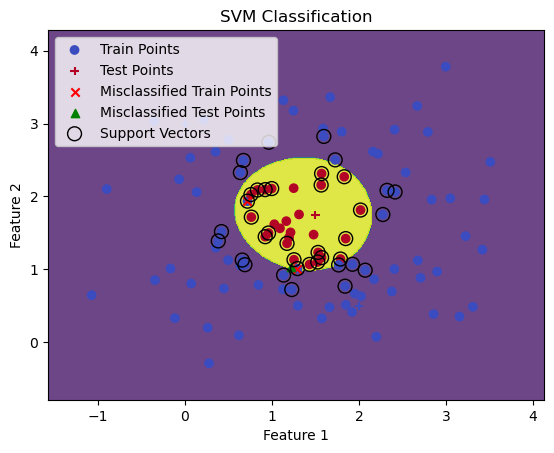

In [310]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', label='Train Points')
plt.scatter(non_classified[:, 0], non_classified[:, 1], c=y_pred, cmap='coolwarm', marker='+', label='Test Points')
plt.scatter(misclassified_train[:, 0], misclassified_train[:, 1], marker='x', color='red', label='Misclassified Train Points')
plt.scatter(misclassified_test[:, 0], misclassified_test[:, 1], marker='^', color='green', label='Misclassified Test Points')
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k', label='Support Vectors')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('SVM Classification')
plt.show()

Классфикация вручную

In [311]:
lmbda1 = clf.dual_coef_[0] # Дуальные коэффициенты, умноженные на метку класса
v1 = clf.support_vectors_ # Опорные вектора 
b1 = clf.intercept_ # Коэффициент смещения 
r1 = clf.coef0 # Коэффициент ядра - смещение
d1 = clf.degree # Коэффициент ядра - степень
gamma = clf.gamma
gamma1 = (1 / (X_train.shape[1] * np.array(X_train).var())) if gamma == 'scale' else gamma

print("Desicion func:", clf.decision_function(non_classified))
predict_test_manually = []
for i in range(len(non_classified)):
        a = 0
        for j in range(len(v1)):
            a+= lmbda1[j] * kernel_function('rbf', non_classified[i], v1[j], gamma1, r1, d1)
        predict_test_manually.append(a + b1[0])
        
print("Manually decision func:", predict_test_manually)
print("Prediction:", y_pred)
print("Manually prediction:", np.sign(predict_test_manually))

Desicion func: [ 1.58143842 -1.80856101 -2.3345515 ]
Manually decision func: [1.5814384222687443, -1.808561006930226, -2.3345515004498303]
Prediction: [ 1 -1 -1]
Manually prediction: [ 1. -1. -1.]


**Nonlin_ker_2**

Импорт данных

In [312]:
df = pd.read_excel('Nonlin_ker_2_2.xlsx', sheet_name='Лист8')
X = np.array(df.iloc[:, :2])
y = np.array(df.iloc[:, -1])

Разделение на обучающую и тестовую выборки

In [313]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state=42)

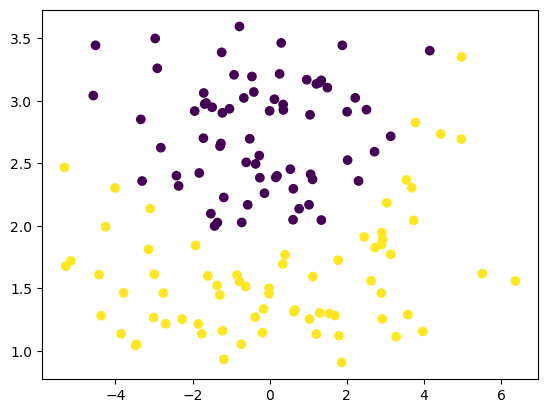

In [314]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', label='Обучающая выборка')

Обучение

In [315]:
clf = svm.SVC(kernel='poly', gamma = 'scale' )
clf.fit(X_train, y_train)
y_train_pred =  np.array(clf.predict(X_train))
y_test_pred = np.array(clf.predict(X_test))

non_classified = np.array([[1.5, 3], [2, 0.5]])
y_pred = clf.predict(non_classified)

Определяем точки, которые модель классифицировала неверно

In [316]:
misclassified_train = X_train[y_train != y_train_pred]
misclassified_test = X_test[y_test != y_test_pred]

Визуализация

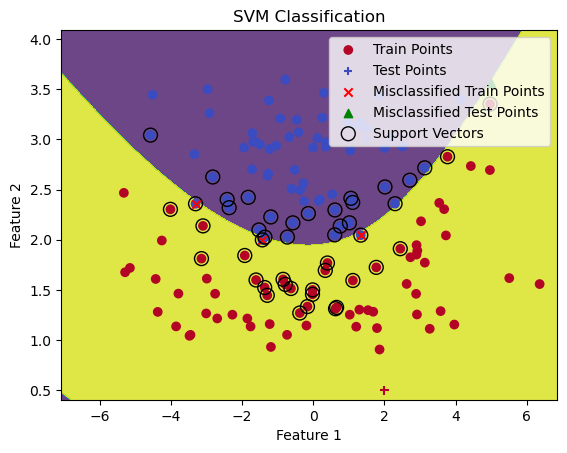

In [317]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', label='Train Points')
plt.scatter(non_classified[:, 0], non_classified[:, 1], c=y_pred, cmap='coolwarm', marker='+', label='Test Points')
plt.scatter(misclassified_train[:, 0], misclassified_train[:, 1], marker='x', color='red', label='Misclassified Train Points')
plt.scatter(misclassified_test[:, 0], misclassified_test[:, 1], marker='^', color='green', label='Misclassified Test Points')
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k', label='Support Vectors')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('SVM Classification')
plt.show()

Классификация вручную

In [318]:
lmbda1 = clf.dual_coef_[0] # Дуальные коэффициенты, умноженные на метку класса
v1 = clf.support_vectors_ # Опорные вектора 
b1 = clf.intercept_ # Коэффициент смещения 
r1 = clf.coef0 # Коэффициент ядра - смещение
d1 = clf.degree # Коэффициент ядра - степень
gamma = clf.gamma
gamma1 = (1 / (X_train.shape[1] * np.array(X_train).var())) if gamma == 'scale' else gamma

print("Desicion func:", clf.decision_function(non_classified))
predict_test_manually = []
for i in range(len(non_classified)):
        a = 0
        for j in range(len(v1)):
            a+= lmbda1[j] * kernel_function('poly', non_classified[i], v1[j], gamma1, r1, d1)
        predict_test_manually.append(a + b1[0])
print("Manually decision func:", predict_test_manually)
print("Prediction:", y_pred)
print("Manually prediction:", np.sign(predict_test_manually))

Desicion func: [-2.95232818  1.48378819]
Manually decision func: [-2.952328176648356, 1.483788193877189]
Prediction: [-1  1]
Manually prediction: [-1.  1.]


**Ирисы Фишера**

Имортируем датасет

In [319]:
iris = datasets.load_iris()
df = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                  columns = iris['feature_names'] + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


Смотрим наиболее коррелирующие признаки  
_Видно, что длина и ширина чашелистника коррелируют меньше всего, поэтому их и берем_

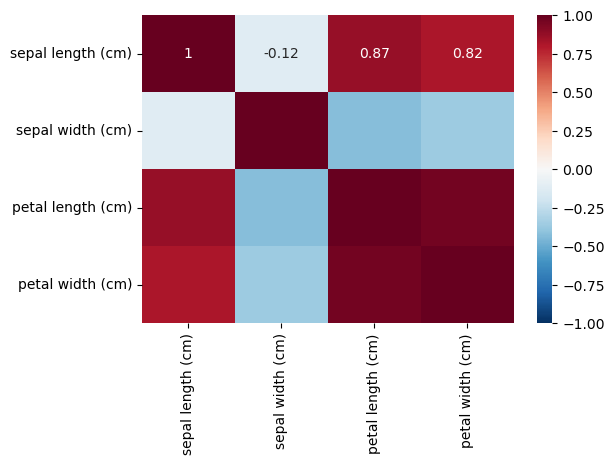

In [320]:
coef_corr = df[iris['feature_names']].corr()
plt.figure(figsize=(6, 4))
hm = sns.heatmap(data = coef_corr, 
                cmap='RdBu_r', # задаёт цветовую схему
                annot=True, # рисует значения внутри ячеек
                vmin=-1, vmax=1)

Визуализируем эти признаки (длину и ширину чашелистника)

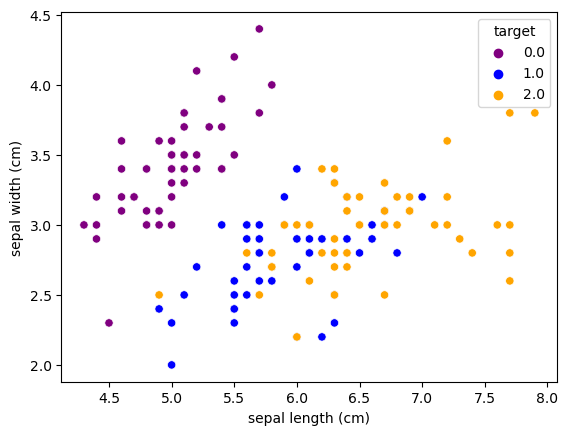

In [321]:
df_selected = df[['sepal length (cm)', 'sepal width (cm)', 'target']]
sns.scatterplot(df_selected, x='sepal length (cm)', y='sepal width (cm)', hue='target', palette=['purple', 'blue', 'orange'])
None

Разбиваем на тренировочную и тестовую выборки

In [322]:
X_train, X_test, y_train, y_test = train_test_split(df_selected[['sepal length (cm)', 'sepal width (cm)']], df_selected['target'], test_size=0.3, random_state=42)

In [323]:
X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test),\
                                    np.array(y_train), np.array(y_test)

Создаем и обучаем модель

In [324]:
clf = svm.SVC(decision_function_shape='ovo', C=10, kernel = 'linear')
clf.fit(X_train, y_train)

SVC(C=10, decision_function_shape='ovo', kernel='linear')

Рисуем графики

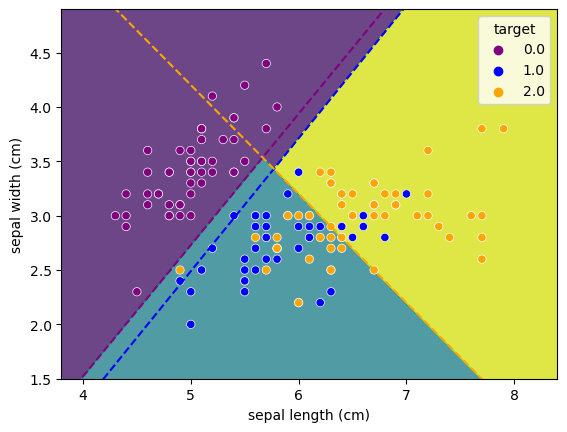

In [325]:
x_min, x_max = df_selected['sepal length (cm)'].min() - 0.5, df_selected['sepal length (cm)'].max() + 0.5
y_min, y_max = df_selected['sepal width (cm)'].min() - 0.5, df_selected['sepal width (cm)'].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

colors = ['purple', 'blue', 'orange']

plt.contourf(xx, yy, Z, alpha=0.8)
sns.scatterplot(df_selected, x='sepal length (cm)', y='sepal width (cm)', hue='target', palette=colors)

# Получаем коэффициенты разделяющих прямых
coef = clf.coef_
intercept = clf.intercept_

xxx = np.array([xx.min(), xx.max()])

# Рисуем разделяющие прямые
plt.plot(xxx, (-(xxx * coef[0, 0]) - intercept[0]) / coef[0, 1], ls="--", color = colors[0])
plt.plot(xxx, (-(xxx * coef[1, 0]) - intercept[1]) / coef[1, 1], ls="--", color = colors[1])
plt.plot(xxx, (-(xxx * coef[2, 0]) - intercept[2]) / coef[2, 1], ls="--", color = colors[2])
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
None

Тестируем тестовую выборку

(45, 2)
Неверно классифицированных: 9


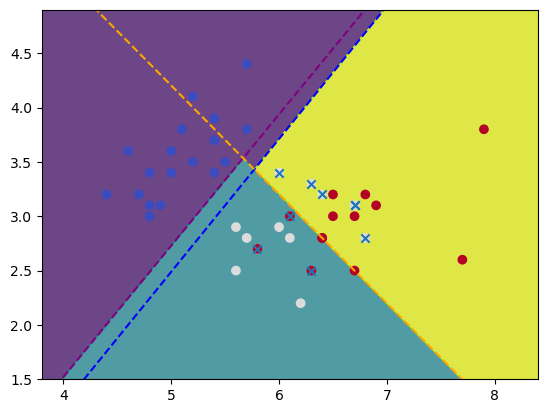

In [331]:
y_pred = clf.predict(X_test)
print(X_test.shape)

misclassified_test = X_test[y_pred != y_test]
print('Неверно классифицированных:', len(misclassified_test))

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', label='Test points')
plt.scatter(misclassified_test[:, 0], misclassified_test[:, 1], marker='x', label='Misclassified points')

# Рисуем разделяющие прямые
plt.plot(xxx, (-(xxx * coef[0, 0]) - intercept[0]) / coef[0, 1], ls="--", color = colors[0])
plt.plot(xxx, (-(xxx * coef[1, 0]) - intercept[1]) / coef[1, 1], ls="--", color = colors[1])
plt.plot(xxx, (-(xxx * coef[2, 0]) - intercept[2]) / coef[2, 1], ls="--", color = colors[2])
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
None

Выбираем 6 элементов разных классов из выборки

/usr/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Неверных классификаций: 1


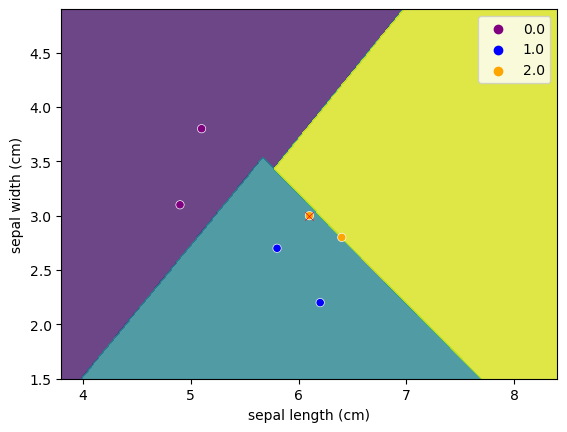

In [328]:
# Выбираем по 2 штуки из каждого класса
df6 = pd.DataFrame({'sepal length (cm)': X_test[:, 0], 'sepal width (cm)': X_test[:, 1], 'target': y_test})
df6 = pd.concat([df6[df6['target'] == class_label][4:6] for class_label in [0, 1, 2]])

# Выбиарем неправильно классифицированные
test_6 = clf.predict(df6[['sepal length (cm)', 'sepal width (cm)']])
mis_6 = df6[df6['target'] != test_6]
print('Неверных классификаций:', len(mis_6))

# Визуализируем
plt.contourf(xx, yy, Z, alpha=0.8)
sns.scatterplot(df6, x='sepal length (cm)', y='sepal width (cm)', hue='target', palette=colors)
sns.scatterplot(mis_6, x='sepal length (cm)', y='sepal width (cm)', marker='x', color='red')
None

In [335]:
def manual_predict(x):
    matrix = np.zeros([3, 3])
    for i in range(3):
        for j in range(i+1,3):
            matrix[i, j] = np.sign(np.dot(x,coef[j]) + intercept[j])
            matrix[j, i] = -np.sign(np.dot(x,coef[j]) + intercept[j])
    # print(matrix)
    return np.argmax(matrix) - 1

Неверных классификаций: 1


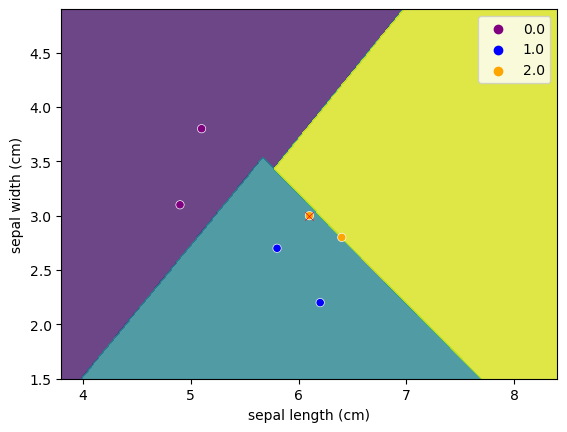

In [336]:
manual_class_6 = [manual_predict(x) for x in np.array(df6[['sepal length (cm)', 'sepal width (cm)']])]
mis_manual_6 = df6[df6['target'] != manual_class_6]
print('Неверных классификаций:', len(mis_manual_6))

# print(manual_class_6)
# Визуализируем
plt.contourf(xx, yy, Z, alpha=0.8)
sns.scatterplot(df6, x='sepal length (cm)', y='sepal width (cm)', hue='target', palette=colors)
sns.scatterplot(mis_manual_6, x='sepal length (cm)', y='sepal width (cm)', marker='x', color='red')
None